In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from math import sqrt
# # Windows
# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# rc('font', family=font_name)
# MacOS
font_name = font_manager.FontProperties(fname='/System/Library/Fonts/Supplemental/AppleGothic.ttf') \
                .get_name()
rc('font', family=font_name)

In [ ]:
from ratings import ratings
ratings

In [3]:
def draw_chart(data, name1, name2):
    plt.figure(figsize=(8, 5))
    x_ratings = []
    y_ratings = []
    for i in ratings[name1]: # i = 키값 
        if i in data[name2]: # 같은 영화를 평가했을때만 처리 
            x_ratings.append(ratings[name1][i])
            y_ratings.append(ratings[name2][i])
            plt.text(ratings[name1][i], ratings[name2][i], i) # 영화 제목을 text로 출력 
    plt.plot(x_ratings, y_ratings, 'g^')
    plt.axis([0,6,0,6])
    plt.xlabel(name1)
    plt.ylabel(name2)
    plt.show()

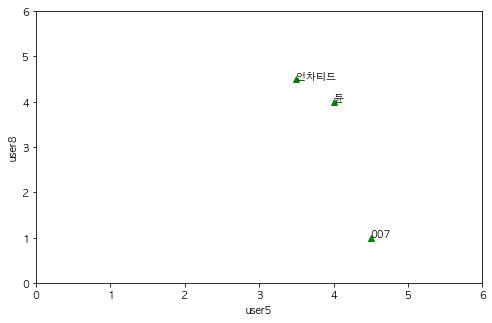

In [12]:
draw_chart(ratings, 'user5', 'user8')

In [9]:
def pearson_correlation_coefficient(data, name1, name2):
    sumX = 0 # X의 합
    sumY = 0 # Y의 합
    sumPowX = 0 # X 제곱의 
    sumPowY = 0 # Y 제곱의 합
    sumXY = 0 # X * Y의 합
    count = 0 # 평점을 준 영화 개수 
    
    for movie in data[name1]: #i = key 
        if movie in data[name2]: # 같은 영화를 평가 했을때만 처리 
            sumX += data[name1][movie]
            sumY += data[name2][movie]
            sumPowX += pow(data[name1][movie], 2)
            sumPowY += pow(data[name2][movie], 2)
            sumXY += data[name1][movie] * data[name2][movie]
            count += 1
    
    return (sumXY - ((sumX * sumY) / count) ) / sqrt((sumPowX - (pow(sumX,2) / count)) * (sumPowY - (pow(sumY,2) / count)))

In [10]:
pearson_correlation_coefficient(ratings, 'user1', 'user3')

0.4950737714883372

In [11]:
pearson_correlation_coefficient(ratings, 'user5', 'user8')

-0.9244734516419049

In [19]:
def nearest_user(data, name, index=3):
    result = []
    for u in data:
        if name != u:
            result.append((pearson_correlation_coefficient(data, name, u), u))
    
    result.sort()
    result.reverse()
    
    return result[:index]

In [34]:
nearest_user(ratings, 'user8', 5)

[(0.9912407071619299, 'user1'),
 (0.8105674873765092, 'user9'),
 (0.7924058156930613, 'user7'),
 (0.5921369082129398, 'user3'),
 (0.13206763594884355, 'user6')]

#### SciPy pearsonr 함수 사용

In [23]:
user1 = [2.5,3.5,3.0,3.5,2.5,3.0]
user3 = [3.0,3.5,1.5,5.0,3.0,3.5]
user5 = [3.5,3.0,4.5,4.0,2.5]
user9 = [3.7,4.0,3.0,4.9,4.1]
import scipy.stats as stats
corr1 = stats.pearsonr(user1, user3)
corr2 = stats.pearsonr(user5, user9)
print(corr1)
print(corr2)

(0.4950737714883372, 0.3180601480969472)
(-0.29887031841660666, 0.6252100234026372)


In [28]:
def get_recommendation_movie(data, user):
    rcmmdList = []
    result = nearest_user(data, user, len(data))
    
    score = 0 
    score_dic = {} # 평점 총합을 위한 dict
    similarity_dic = {} # 유사도 총합을 위한 dict
    
    for similarity, name in result:
        # 1. similirity == 0 -> 무시
        if similarity < 0:
            continue
            
        # 2. name이 평가하지 않은 영화에 대해서 처리 
        for movie in data[name]:
            if movie not in data[user]: 
                score += similarity * data[name][movie] # 3. 영화평점 * 유사도
                score_dic.setdefault(movie, 0) # 기본값 설정 
                score_dic[movie] += score # 합계 구하기 
                
                # 4. 조건에 맞는 사람의 유사도의 누적합 구하기 
                similarity_dic.setdefault(movie, 0)
                similarity_dic[movie] += similarity
            
            score = 0 
    
    # 평점 총합/유사도 총합 
    for key in score_dic: 
        score_dic[key] = score_dic[key] / similarity_dic[key]
        rcmmdList.append((score_dic[key], key))
    
    rcmmdList.sort()
    rcmmdList.reverse()
    
    return rcmmdList

In [33]:
get_recommendation_movie(ratings, 'user8')

[(3.2233799819183644, '스파이더맨'),
 (3.0216298475933865, '더배트맨'),
 (2.9490704222575337, '엔칸토')]

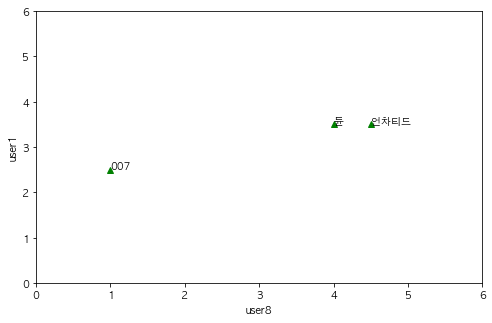

In [36]:
draw_chart(ratings, 'user8', 'user1')

In [37]:
print(pearson_correlation_coefficient(ratings, 'user2', 'user6'))
print(pearson_correlation_coefficient(ratings, 'user7', 'user1'))
print('-' * 20)
print(nearest_user(ratings, 'user8', 3))

0.3261742025200799
0.8964214570007957
--------------------
[(0.9912407071619299, 'user1'), (0.8105674873765092, 'user9'), (0.7924058156930613, 'user7')]


In [38]:
rcmmdList = get_recommendation_movie(ratings, 'user8')
rcmmdList

[(3.2233799819183644, '스파이더맨'),
 (3.0216298475933865, '더배트맨'),
 (2.9490704222575337, '엔칸토')]

In [39]:
rcmmdList[0]

(3.2233799819183644, '스파이더맨')